<a href="https://colab.research.google.com/github/mariap13/CMSC320-FinalProject/blob/main/CMSC320_Final_Project_MP_KRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Baltimore City Crime Data
## Data Preprocessing

For this project we will be pulling data from the Open Data Baltimore API, specifically the major crime dataset featured in the link below, and loading it into a dataframe for further analysis.<br /> https://data.baltimorecity.gov/datasets/baltimore::part-1-crime-data/about <br> **Please download the CSV file under download. (file is too large to place in repo)**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
crime_data = pd.read_csv('/content/Part1_Crime_Beta_5307206680000182585.csv')
pd.options.display.max_columns = None
crime_data.info()

<ipython-input-53-ebe1a7515366>:1: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv('/content/Part1_Crime_Beta_5307206680000182585.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158000 entries, 0 to 157999
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RowID            158000 non-null  int64  
 1   CCNumber         158000 non-null  object 
 2   CrimeDateTime    158000 non-null  object 
 3   CrimeCode        158000 non-null  object 
 4   Description      158000 non-null  object 
 5   Inside_Outside   7975 non-null    object 
 6   Weapon           29058 non-null   object 
 7   Post             155619 non-null  float64
 8   Gender           137045 non-null  object 
 9   Age              127139 non-null  float64
 10  Race             156046 non-null  object 
 11  Ethnicity        8090 non-null    object 
 12  Location         157292 non-null  object 
 13  Old_District     147556 non-null  object 
 14  New_District     8070 non-null    object 
 15  Neighborhood     155558 non-null  object 
 16  Latitude         157345 non-null  floa

In [5]:
pd.options.display.max_columns = None
crime_data.head()

,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,Location,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents,x,y
0,1,13H12424,8/25/2013 9:50:00 PM,3B,ROBBERY,NaN,NaN,211.0,M,51.0,UNKNOWN,NaN,200 N CENTRAL AVE,SOUTHEAST,NaN,PLEASANT VIEW GARDENS,39.293954,-76.600034,"(39.293954481156455,-76.60003414405044)",PARKING LOT-OUTSIDE,1,-7.660003e+01,3.929395e+01
1,2,13K35202,8/25/2013 1:30:00 AM,6J,LARCENY,NaN,NaN,125.0,F,NaN,WHITE,NaN,400 GEORGE ST,CENTRAL,NaN,SETON HILL,39.295666,-76.622189,"(39.295665890963129,-76.622189389530746)",NaN,1,-7.662219e+01,3.929567e+01
2,3,13H12420,8/25/2013 10:15:00 PM,4D,AGG. ASSAULT,NaN,HANDS,211.0,M,15.0,BLACK_OR_AFRICAN_AMERICAN,NaN,300 S BALLOU CT,SOUTHEAST,NaN,PERKINS HOMES,39.287399,-76.597280,"(39.287398653927177,-76.597279858121908)",PUBLIC HOUSING,1,-7.659728e+01,3.928740e+01
3,4,13H12236,8/25/2013 1:30:00 AM,6D,LARCENY FROM AUTO,NaN,NaN,NaN,M,34.0,BLACK_OR_AFRICAN_AMERICAN,NaN,2500 LOYOLA NORTHWAY,NaN,NaN,NaN,0.000000,0.000000,"(0,0)",STREET,1,5.684342e-14,5.684342e-14
4,5,13H13118,8/25/2013 4:00:00 PM,5A,BURGLARY,NaN,NaN,333.0,F,45.0,BLACK_OR_AFRICAN_AMERICAN,NaN,2600 E MADISON ST,EASTERN,NaN,MADISON-EASTEND,39.300150,-76.580073,"(39.300149801842849,-76.580072527683356)",ROW/TOWNHOUSE-VAC,1,-7.658007e+01,3.930015e+01


### Description of the Crime Data columns:
*   `RowID` - The unique ID for each entry in the dataset
*   `CCNumber` -
*   `CrimeCode` - The police Crime Code assigned to the crime
*   `Description` - The type of crime that was committed
*   `Inside_Outside` - Describes whether the crime occured indoors or outdoors
*   `Weapon` - Described what weapon was used, if any, in the crime
*   `Post` - The police post area the crime occured in
*   `Gender` - The gender ('Female', 'Male', 'Undefined') of the perpetrator
*   `Age` - The age of the perpetrator
*   `Race` - The race of the perpetrator
*   `Ethnicity` - The ethnicity of the perpetrator
*   `Location` - The address of the crime
*   `Old_District` - The district where the crime occured, according to the system used by Baltimore city before July 2023
*   `New_District` - The district where the crime occured, according to the system used by Baltimore city after July 2023
*   `Neighborhood` - The neighborhood where the crime occured
*   `Latitude` - Latitude coordinate of the crime location
*   `Longitude` - Longitude coordinate of the crime location
*   `GeoLocation` - Coordinates of the crime location to be used by ArcGIS
*   `PremiseType` - Brief description of the setting where the crime occured, for example, "Convenience store"
*   `Total_Incidents` - The number of incidents covered by the entry (this is '1' for every entry)




## Data Parsing
In order to avoid errors with future calculations/manipulations, the'CrimeDateTime' column was converted to datetime, and dates that were set to NaN due to being out of range (ex/a crime that happened in 1557) were removed. The column was then separated into a 'Date' column and a 'Time' column.<br /><br />The 'Age' column was set to integers from float values, and the frequencies of all unique ages in the column were printed to display the distribution of ages.  Later on we removed the outliers from the 'Age' column.


In [54]:
crime_data.Age = crime_data.Age.convert_dtypes(convert_integer=True)
crime_data.Age = crime_data.Age.abs()
print(crime_data.Age.value_counts().sort_index())

Age
0       89
1       41
2       78
3       52
4       77
        ..
152      1
194      1
216      1
436      1
8251     1
Name: count, Length: 113, dtype: Int64


In [55]:
crime_data.CrimeDateTime = pd.to_datetime(crime_data.CrimeDateTime, errors='coerce', format='mixed')
crime_data.dropna(axis=0, subset=['CrimeDateTime'], inplace=True)
print("Null 'CrimeDateTime' values:", str(crime_data.CrimeDateTime.isna().sum()))
crime_data['Date'] = [d.date() for d in crime_data['CrimeDateTime']]
crime_data['Time'] = [d.time() for d in crime_data['CrimeDateTime']]
print(crime_data['Date'])
print(crime_data['Time'])

Null 'CrimeDateTime' values: 0
0         2013-08-25
1         2013-08-25
2         2013-08-25
3         2013-08-25
4         2013-08-25
             ...    
157995    2024-07-24
157996    2024-07-24
157997    2024-07-24
157998    2024-07-24
157999    2024-07-24
Name: Date, Length: 157996, dtype: object
0         21:50:00
1         01:30:00
2         22:15:00
3         01:30:00
4         16:00:00
            ...   
157995    15:43:00
157996    23:00:00
157997    04:28:00
157998    04:45:00
157999    02:30:00
Name: Time, Length: 157996, dtype: object


##Data Exploration and Summary Statistics
Once we cleaned features of the crime data, we examined trends within and across these features.


In [37]:
#for (col_name, col_data) in crime_data.items():
#  print("Unique values in", col_name, ": \t", col_data.unique())
col_names = ["Description", "Weapon", "Age", "Race", "Ethnicity", "Neighborhood", "PremiseType"]
for i in col_names:
  print("Frequency of unique values in: ", crime_data[i].value_counts())

Frequency of unique values in:  Description
LARCENY                 35943
COMMON ASSAULT          29543
BURGLARY                25313
LARCENY FROM AUTO       22551
AGG. ASSAULT            16098
AUTO THEFT              12506
ROBBERY                 11591
RAPE                     1136
ROBBERY - COMMERCIAL     1050
ARSON                     830
ROBBERY - CARJACKING      631
HOMICIDE                  521
SHOOTING                  283
Name: count, dtype: int64
Frequency of unique values in:  Weapon
FIREARM                           9128
OTHER                             8099
KNIFE                             5426
HANDS                             2238
PERSONAL_WEAPONS                  2226
FIRE                               810
HANDGUN                            430
KNIFE_CUTTING_INSTRUMENT           309
BLUNT_OBJECT                       208
UNKNOWN                             61
ASPHYXIATION                        46
PERSONAL_WEA                        25
MOTOR_VEHICLE_VESSEL             

###Detecting outliers in the data
Creating a box plot for the 'Age' column revealed that ages higher than 80 are considered outliers. Once this was discovered, we removed the outliers from the 'Age' column.<br />


8251


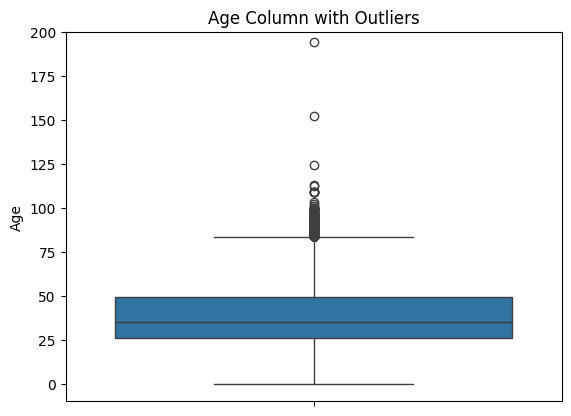

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(crime_data['Age'])
print(str(crime_data['Age'].max()))
plt.ylim(-10, 200)
plt.title(f'Age Column with Outliers')
plt.show()

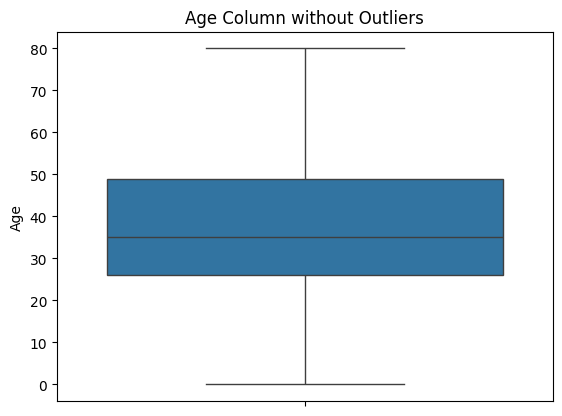

In [59]:
removed_outliers = crime_data[crime_data['Age'] <= 80]
sns.boxplot(removed_outliers['Age'])
plt.title(f'Age Column without Outliers')
plt.show()
index_names = crime_data[crime_data['Age'] > 80].index
df = crime_data.copy()
df.drop(index_names, inplace=True)#drop outlier ages from the dataset

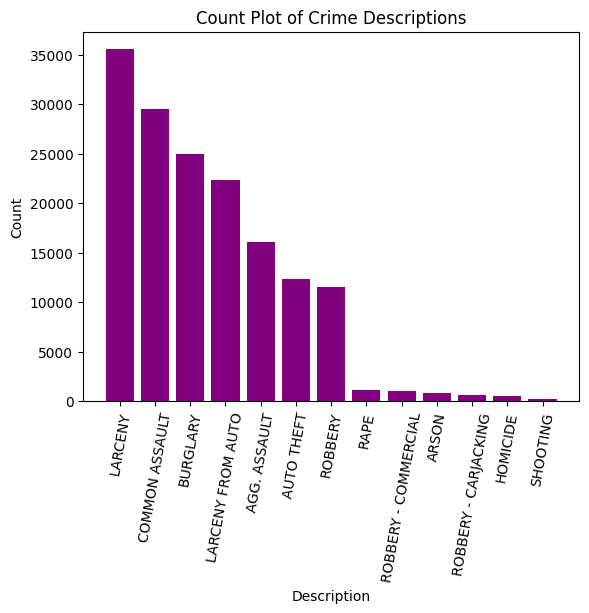

In [61]:
descrip_counts = df['Description'].value_counts()

plt.bar(descrip_counts.index, descrip_counts, color='purple')
plt.title('Count Plot of Crime Descriptions')
plt.xlabel('Description')
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.show()

###Hypothesis Test 1:
**Null Hypothesis:** The district where a crime was committed will have an impact of the likelihood of the nature (description) of the crime.<br />
**Alternate Hypothesis:** The district where a crime was committed will not have an impact of the likelihood of the nature (description) of the crime.<br />
For this test we used a Chi-Squared test, since both variables are categorical.

In [63]:
#Columns: district, description
contingency = pd.crosstab(df.Old_District, df.Description)
contingency

Description,AGG. ASSAULT,ARSON,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,SHOOTING
Old_District,,,,,,,,,,,,,
CENTRAL,1437,47,800,1613,3148,38,5294,4089,132,1378,46,99,13
EASTERN,1757,65,743,1877,3151,67,2375,1542,104,807,40,58,28
NORTHEAST,2145,123,2187,5013,4326,64,4853,2557,157,1743,75,157,19
NORTHERN,1195,78,1159,3149,2294,46,3990,2651,112,1171,45,136,11
NORTHWEST,1562,92,1350,2853,2346,62,3152,1530,115,1210,88,123,17
SOUTHEAST,1755,65,1284,2672,3644,29,4718,4312,110,1538,39,121,12
SOUTHERN,1739,114,1214,2759,3207,42,4078,2164,129,1095,41,104,20
SOUTHWEST,1500,121,1317,2596,2402,60,2476,1318,93,859,61,77,34
WESTERN,1704,80,1083,1750,2843,73,2220,911,112,823,60,56,40


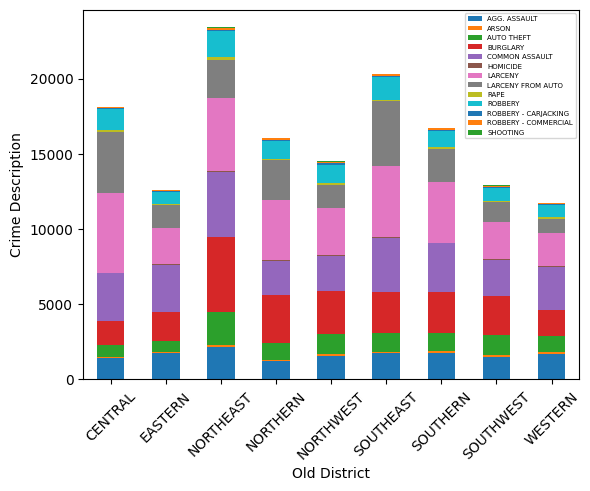

In [64]:
plt = contingency.plot.bar(rot=45, xlabel="Old District", ylabel="Crime Description", stacked=True).legend(prop={'size': 5})

In [79]:
import scipy.stats as stats
chi2_res = stats.chi2_contingency(contingency)
if chi2_res.pvalue < 0.05:
  print("Reject, p-value is", str(chi2_res.pvalue))
else:
  print("Fail to Reject, p-value is", str(chi2_res.pvalue))

Reject, p-value is 0.0


Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. District does not have a significant impact on the likelihood that a type of crime will occur.<br /><br />
###Hypothesis Test 2: ANOVA
**Null Hypothesis:** The description of the crime and the weapon used do not significantly impact one another.<br />
**Alternate Hypothesis:** The description of the crime and the weapon used do significantly impact one another.

In [66]:
import matplotlib.pyplot as plt

In [67]:
# Group by 'Description' and 'Weapon'
grouped_description_weapon = df.groupby(['Description', 'Weapon']).size().reset_index(name='Count')
print(grouped_description_weapon)

     Description                          Weapon  Count
0   AGG. ASSAULT                    ASPHYXIATION     40
1   AGG. ASSAULT               AUTOMATIC_FIREARM      5
2   AGG. ASSAULT                    BLUNT_OBJECT    166
3   AGG. ASSAULT  DRUGS_NARCOTICS_SLEEPING_PILLS      4
4   AGG. ASSAULT                         FIREARM   2658
..           ...                             ...    ...
83      SHOOTING               AUTOMATIC_FIREARM      2
84      SHOOTING                         FIREARM    233
85      SHOOTING                         HANDGUN     44
86      SHOOTING                           RIFLE      2
87      SHOOTING                         UNKNOWN      2

[88 rows x 3 columns]


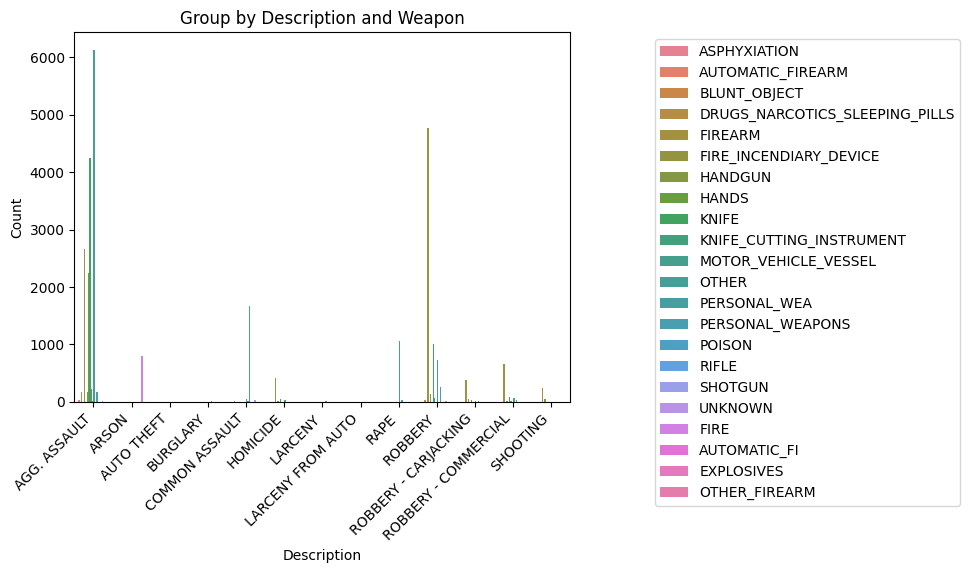

In [74]:
sns.barplot(x='Description', y='Count', hue='Weapon', data=grouped_description_weapon)

plt.title('Group by Description and Weapon')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 1))
plt.show()

In [75]:
anova_data = [group['Count'].values for name, group in grouped_description_weapon.groupby('Description')]

#ANOVA
f_statistic, p_value = stats.f_oneway(*anova_data)

print("P-value:", p_value)

P-value: 0.6891169283664305


In [76]:
if p_value < 0.05:
    print("Reject")
else:
    print("Fail to reject")

Fail to reject


Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. Therefore, The description of the crime and the weapon used do significantly impact one another.

###Hypothesis Test 3: T-Test
T-test is a statistical test used to determine if there is a significant difference between the means of two groups. It is used when you have a smaller sample size (typically n < 30) or when you don't know the population standard deviation (σ) and must estimate it from the sample.

**Null Hypothesis:**  There is no difference in the average age of male and female perpetrators. <br>
**Alternate Hypothesis:** There is a difference in the average age of male and female perpetrators.

In [80]:
male_ages = df[(df['Gender'] == 'M')  & (df['Age'].notna())]['Age']
female_ages = df[(df['Gender'] == 'F')  & (df['Age'].notna())]['Age']
print(male_ages)
print(female_ages)

# t-test
t_statistic, p_value = stats.ttest_ind(male_ages, female_ages, equal_var=False)  # Use equal_var=False for Welch's t-test

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

0         51
2         15
3         34
8         52
9         28
          ..
157991    50
157992    25
157993    50
157995    36
157999    55
Name: Age, Length: 58677, dtype: Int64
4         45
5         25
6         25
7         44
11        45
          ..
157990    34
157994    33
157996    61
157997    26
157998    40
Name: Age, Length: 66994, dtype: Int64
T-statistic: 28.219366316339038
P-value: 1.2537954123625157e-174


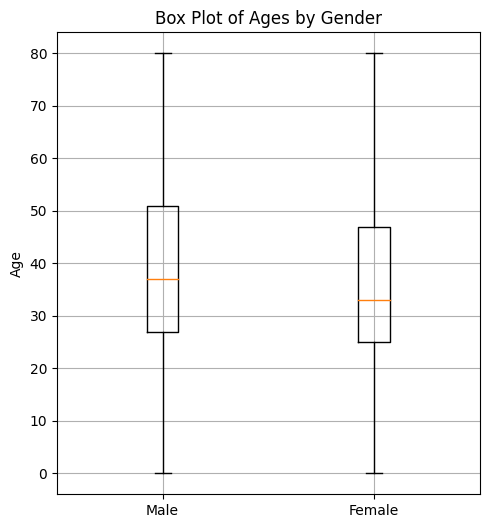

In [81]:
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
plt.boxplot([male_ages, female_ages], labels=['Male', 'Female'])
plt.title('Box Plot of Ages by Gender')
plt.ylabel('Age')
plt.grid()

plt.show()

In [82]:
if p_value < 0.05:
    print("Reject")
else:
    print("Fail to reject")

Reject


Since the p value is less than a 5% level of significance, the null hypothesis can be rejected. The t-test shows that there is a significant difference in the average ages of male and female perpetrators in this data.